<a href="https://colab.research.google.com/github/diegorusso/deep-learning-from-scratch/blob/master/05_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient Descent

**Full-batch Gradient Descent**: you are calculating the exact gradient using the full training dataset, so at each step you are going to move straight downhill in the direction of the steepest slope

**Stochastic gradient descent**: approximates the gradient at each step using a subset of the full training dataset, known as a mini-batch, so each step is taken in a random direction that tends to be downhill, but could actually be in any direction, even uphill.

The SGD wins because it **uses much less computation required** at each step and its random nature may **help escaping from stationary points.**

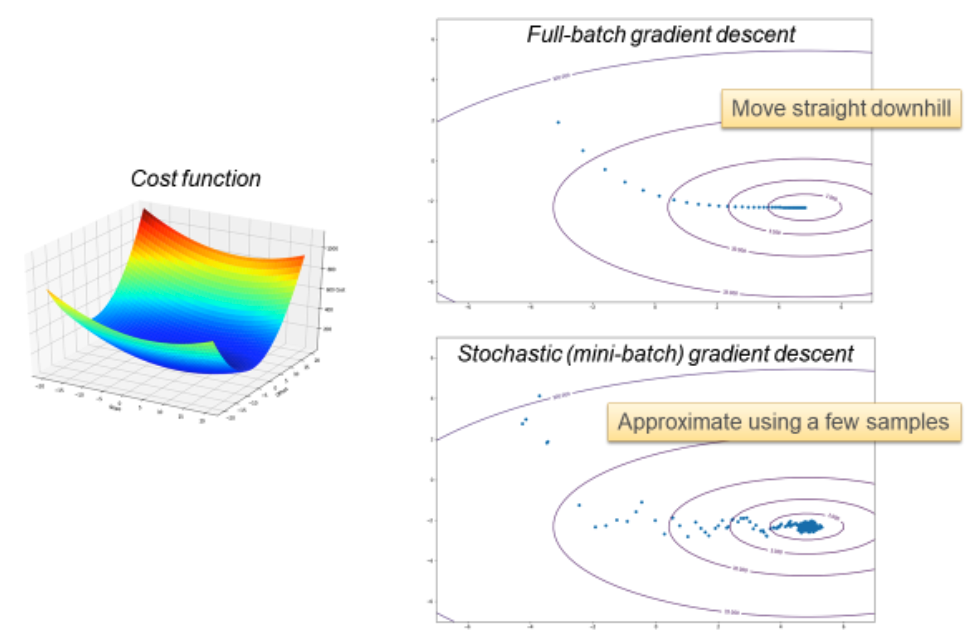

Each mini-batch:
* should be representative of the entire dataset otherwise the gradient might become unstable
* should be balanced across the classe
* should be the right size otherwise it won't fit in memory (if too big) or the training take too much (if too small). Between 32 and 128 samples should be OK.

## Stationary points

A stationary point is a point on a surface, possibly a high-dimensional surface, where the **partial derivative (gradient) of the surface is zero in every direction.**

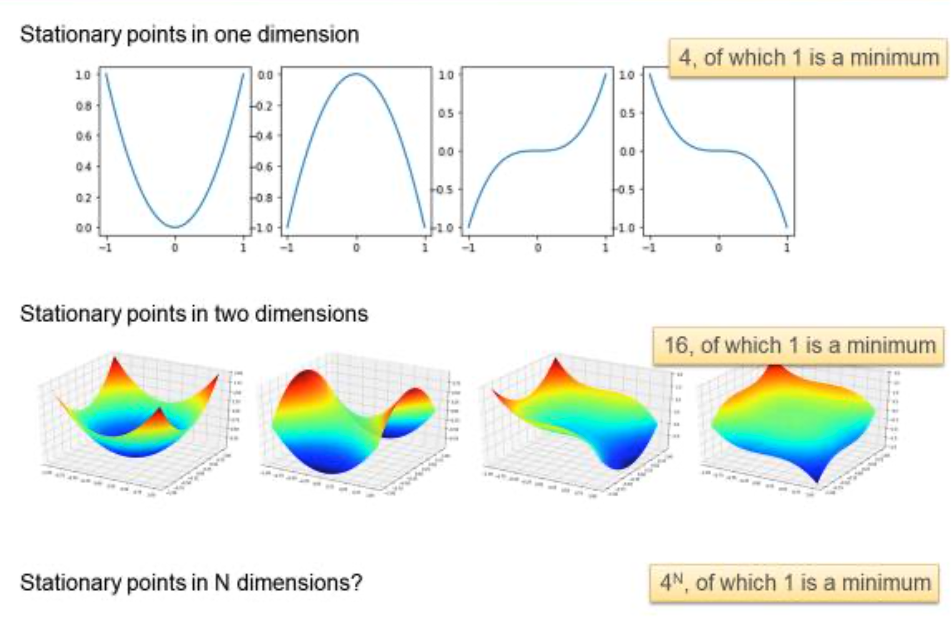

If we consider a neural network with a million of trainable parameters, the majority of the stationary points are saddle points and not local minima. The main challenge for the SGD is **to avoid saddle point and not to avoid local minima!**

## Learning rate

The choice of the learning rate (denoted as alpha) can have a big impact on the gradient descent. 

When the learning rate is too low, gradient descent is stable but it progresses very slowly. Increasing it, it's quicker but the gradient descend could become unstable.

Let's see how we can implement it with TensorFlow.

Let's use the MNIST dataset.

11493376/11490434 [==============================] - 0s 0us/step

Read 60000 training images


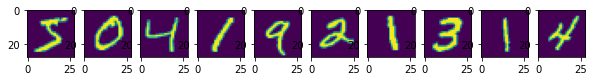

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils    import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

n_train = len(x_train)

print()
print('Read {} training images'.format(n_train))

# Plot a few examples so we can visualize the dataset
image_size = 28
m = 10

plt.rcParams["figure.figsize"] = (10,1)
fig = plt.figure()
for i in range(m):
    a = fig.add_subplot(1,m,i+1)
    plt.imshow(x_train[i])
plt.show()

x_train = x_train.reshape(-1, 784).astype(np.float32)
x_test  = x_test.reshape(-1, 784).astype(np.float32)
n_labels = 10
y_train = to_categorical(y_train, n_labels)
y_test  = to_categorical(y_test, n_labels)

In [2]:
import tensorflow
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

num_hidden     = 128
minibatch_size = 100
n_epochs       = 10
steps_per_epoch = n_train//minibatch_size

def build_and_run_graph(learning_rate):
    tensorflow.keras.backend.clear_session()
        
    model = Sequential()
    model.add(Dense(input_shape=(image_size*image_size,), units=num_hidden, activation='relu'))
    model.add(Dense(units=n_labels, activation='softmax'))
    # Here we are setting the learning rate to the SGD.
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=learning_rate), metrics=['accuracy'])
    
    # Define a Keras callback
    class acc_history(tensorflow.keras.callbacks.Callback):
        def on_train_begin(self, logs={}):
            self.acc = []
            
        # Store the accuracy at the end of each gradient descent step
        def on_batch_end(self, batch, logs={}):
            self.acc.append(logs['accuracy'])
            
        # Print the accuracy at the end of each epoch
        def on_epoch_end(self, epochs, logs={}):
            print('Step = {:6}, loss = {:6.3f}, minibatch accuracy = {:4.1f}'.format(
                epochs*steps_per_epoch, logs['loss'], logs['accuracy']*100))
            
    logs = acc_history()
    
    model.fit(x_train, y_train, epochs=n_epochs, batch_size=minibatch_size, verbose=0, callbacks=[logs])
    
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(logs.acc)
    plt.show()

Step =      0, loss =  3.074, minibatch accuracy = 78.1
Step =    600, loss =  0.630, minibatch accuracy = 85.5
Step =   1200, loss =  0.469, minibatch accuracy = 88.5
Step =   1800, loss =  0.386, minibatch accuracy = 90.1
Step =   2400, loss =  0.330, minibatch accuracy = 91.3
Step =   3000, loss =  0.291, minibatch accuracy = 92.2
Step =   3600, loss =  0.265, minibatch accuracy = 92.8
Step =   4200, loss =  0.243, minibatch accuracy = 93.2
Step =   4800, loss =  0.226, minibatch accuracy = 93.5
Step =   5400, loss =  0.214, minibatch accuracy = 93.8


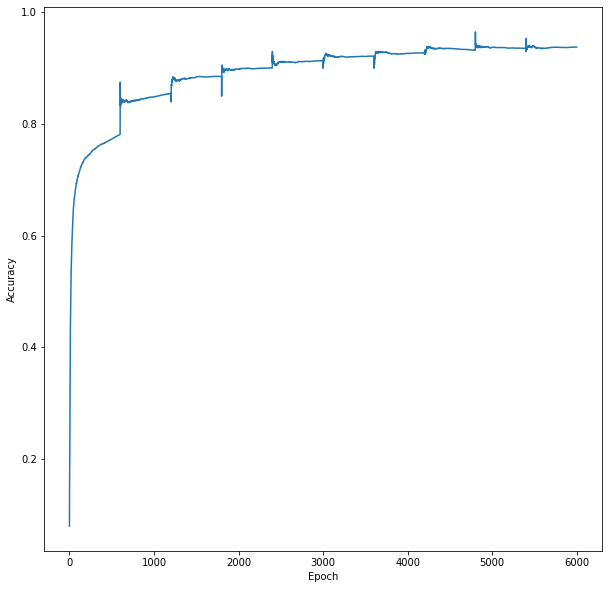

In [3]:
build_and_run_graph(learning_rate = 0.001)

Step =      0, loss = 34.572, minibatch accuracy = 56.8
Step =    600, loss =  1.092, minibatch accuracy = 66.9
Step =   1200, loss =  0.943, minibatch accuracy = 69.9
Step =   1800, loss =  0.920, minibatch accuracy = 69.5
Step =   2400, loss =  0.922, minibatch accuracy = 68.4
Step =   3000, loss =  1.122, minibatch accuracy = 60.1
Step =   3600, loss =  1.056, minibatch accuracy = 62.6
Step =   4200, loss =  1.081, minibatch accuracy = 61.2
Step =   4800, loss =  1.004, minibatch accuracy = 63.3
Step =   5400, loss =  1.059, minibatch accuracy = 63.2


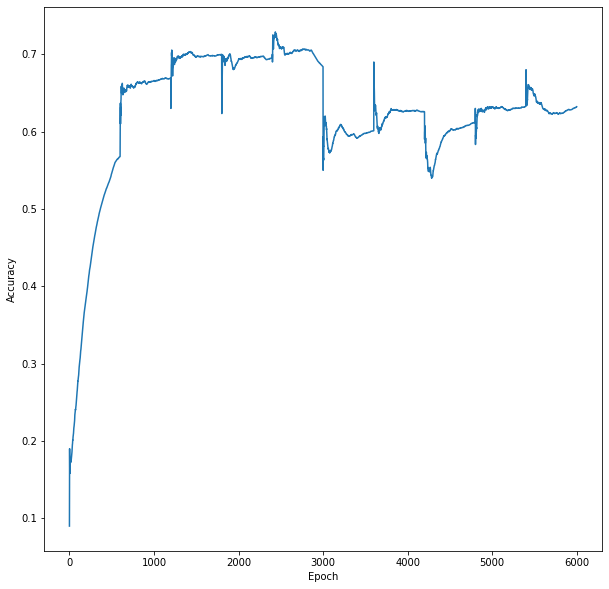

In [4]:
build_and_run_graph(learning_rate = 0.01)

Step =      0, loss = 11.092, minibatch accuracy = 76.9
Step =    600, loss =  4.069, minibatch accuracy = 86.9
Step =   1200, loss =  2.934, minibatch accuracy = 88.9
Step =   1800, loss =  2.328, minibatch accuracy = 90.1
Step =   2400, loss =  1.936, minibatch accuracy = 90.9
Step =   3000, loss =  1.666, minibatch accuracy = 91.4
Step =   3600, loss =  1.461, minibatch accuracy = 91.9
Step =   4200, loss =  1.295, minibatch accuracy = 92.3
Step =   4800, loss =  1.169, minibatch accuracy = 92.7
Step =   5400, loss =  1.063, minibatch accuracy = 93.1


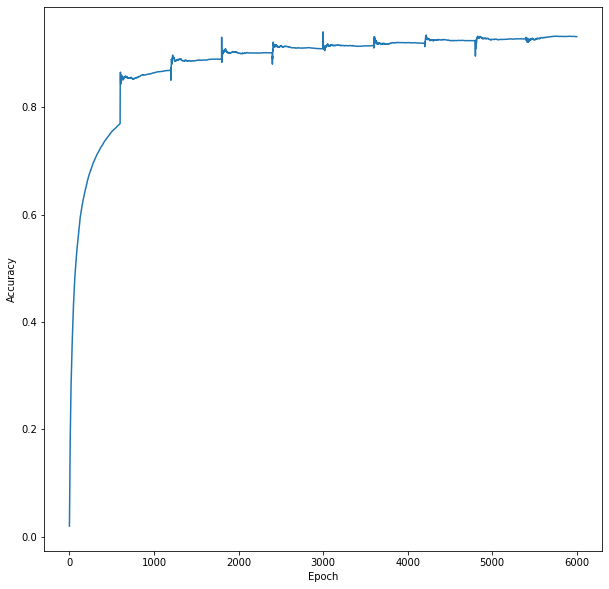

In [5]:
build_and_run_graph(learning_rate = 0.0001)

The best results can sometimes be achieved by imposing a **learning rate decay schedule.** (or annealing schedule)
This means starting with a high learning rate then gradually decreasing the learning rate throughout the training run

Let's see how we can do it in Tensorflow.

In [7]:
import tensorflow
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD, Adam

num_hidden     = 128
minibatch_size = 100
n_epochs       = 10
steps_per_epoch = n_train//minibatch_size

def build_and_run_graph2(learning_rate, decay_rate):
    tensorflow.keras.backend.clear_session()
        
    model = Sequential()
    model.add(Dense(input_shape=(image_size*image_size,), units=num_hidden, activation='relu'))
    model.add(Dense(units=n_labels, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    
    # Define a learning rate decay scheduler
    # In this particular case, we provide a function exp_decay that
    # exponentially decays the learning rate at the end of each epoch
    def exp_decay(epoch):
       return learning_rate * decay_rate ** epoch

    lr_scheduler = tensorflow.keras.callbacks.LearningRateScheduler(exp_decay)
    
    # Define a Keras callback
    class acc_history(tensorflow.keras.callbacks.Callback):
        def on_train_begin(self, logs={}):
            self.acc = []
            
        # Store the accuracy at the end of each gradient descent step
        def on_batch_end(self, batch, logs={}):
            self.acc.append(logs['accuracy'])
            
        # Print the accuracy at the end of each epoch
        def on_epoch_end(self, epochs, logs={}):
            print('Step = {:6}, loss = {:6.3f}, minibatch accuracy = {:4.1f}, rate = {:5.3f}'.format(
                epochs*steps_per_epoch, logs['loss'], logs['accuracy']*100, 
                tensorflow.keras.backend.get_value(self.model.optimizer.lr) ))
            
    logs = acc_history()
    
    model.fit(x_train,
              y_train,
              epochs=n_epochs,
              batch_size=minibatch_size,
              verbose=0,
              callbacks=[logs, lr_scheduler])
    
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(logs.acc)
    plt.show()

Following few examples with different decay_rate values.

Step =      0, loss =  4.624, minibatch accuracy = 88.0, rate = 0.001
Step =    600, loss =  0.674, minibatch accuracy = 92.8, rate = 0.001
Step =   1200, loss =  0.371, minibatch accuracy = 94.4, rate = 0.000
Step =   1800, loss =  0.258, minibatch accuracy = 95.5, rate = 0.000
Step =   2400, loss =  0.204, minibatch accuracy = 96.1, rate = 0.000
Step =   3000, loss =  0.177, minibatch accuracy = 96.6, rate = 0.000
Step =   3600, loss =  0.162, minibatch accuracy = 96.8, rate = 0.000
Step =   4200, loss =  0.154, minibatch accuracy = 97.0, rate = 0.000
Step =   4800, loss =  0.150, minibatch accuracy = 97.1, rate = 0.000
Step =   5400, loss =  0.147, minibatch accuracy = 97.1, rate = 0.000


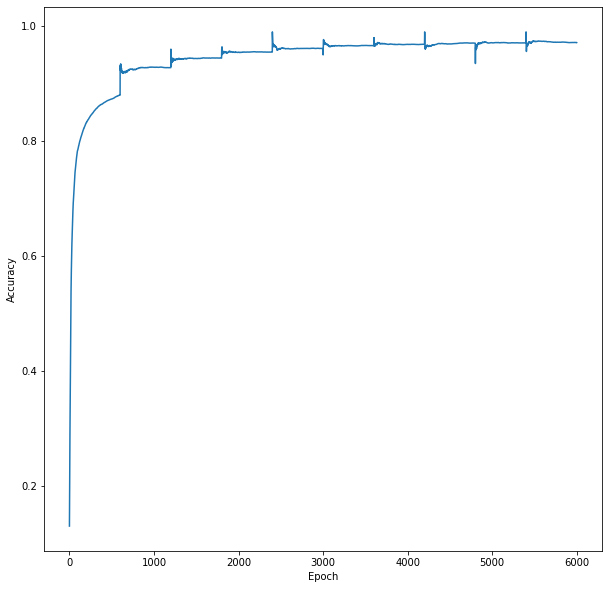

In [8]:
build_and_run_graph2(learning_rate = 0.001, decay_rate = 0.5)

Step =      0, loss =  4.331, minibatch accuracy = 86.7, rate = 0.001
Step =    600, loss =  0.582, minibatch accuracy = 91.2, rate = 0.001
Step =   1200, loss =  0.322, minibatch accuracy = 93.2, rate = 0.000
Step =   1800, loss =  0.235, minibatch accuracy = 94.5, rate = 0.000
Step =   2400, loss =  0.177, minibatch accuracy = 95.5, rate = 0.000
Step =   3000, loss =  0.142, minibatch accuracy = 96.3, rate = 0.000
Step =   3600, loss =  0.119, minibatch accuracy = 96.8, rate = 0.000
Step =   4200, loss =  0.104, minibatch accuracy = 97.2, rate = 0.000
Step =   4800, loss =  0.093, minibatch accuracy = 97.4, rate = 0.000
Step =   5400, loss =  0.085, minibatch accuracy = 97.6, rate = 0.000


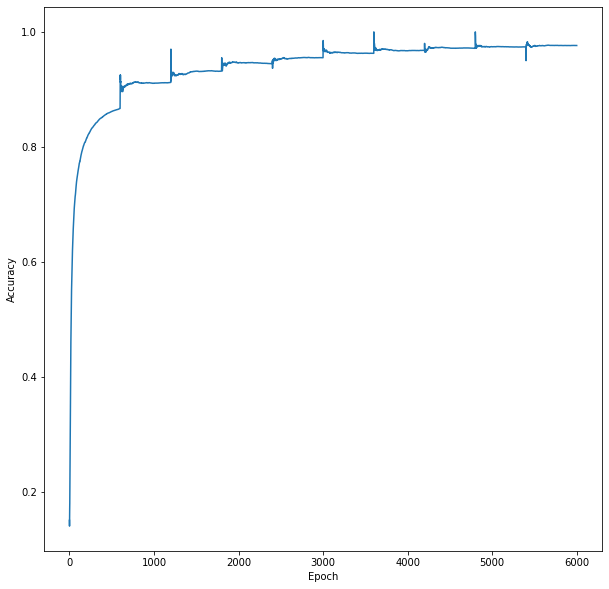

In [9]:
build_and_run_graph2(learning_rate = 0.001, decay_rate = 0.7)

Step =      0, loss =  4.278, minibatch accuracy = 86.4, rate = 0.001
Step =    600, loss =  0.543, minibatch accuracy = 90.4, rate = 0.001
Step =   1200, loss =  0.318, minibatch accuracy = 93.0, rate = 0.001
Step =   1800, loss =  0.232, minibatch accuracy = 94.3, rate = 0.001
Step =   2400, loss =  0.186, minibatch accuracy = 95.1, rate = 0.001
Step =   3000, loss =  0.150, minibatch accuracy = 95.9, rate = 0.001
Step =   3600, loss =  0.133, minibatch accuracy = 96.3, rate = 0.001
Step =   4200, loss =  0.111, minibatch accuracy = 96.8, rate = 0.000
Step =   4800, loss =  0.102, minibatch accuracy = 97.1, rate = 0.000
Step =   5400, loss =  0.085, minibatch accuracy = 97.5, rate = 0.000


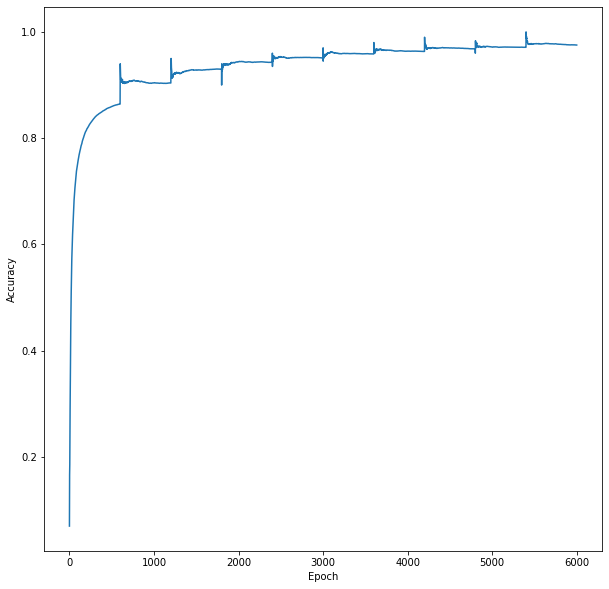

In [10]:
build_and_run_graph2(learning_rate = 0.001, decay_rate = 0.9)

## Adaptive Per-Parameter Learning Rates

There are several popular gradient descent algorithms that either
1. keep a separate learning rate for each trained parameter
2. adapt the learning rate over time depending on the gradient
3. both the above

**RMSprop** is one example of an algorithm that does both

There are many variants on the adaptive per-parameter learning rate gradient descend algorithm. The **Adam** algorithm is a popular one that combines RMSprop with **momentum**.

If we use the term velocity to describe the amount by which we adjust the weights on each step, then momentum means **the tendency for the velocity to stay constant in magnitude and direction**. If the momentum is low, then the velocity can change dramatically at each step according to the local gradient. If the momentum is high, then the velocity will tend to keep its current value, and the local gradient will only cause small, incremental changes to the velocity.

Tensorflow makes easy the use of Adam optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
